In [1]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving data-iris.csv to data-iris.csv
Saving data-iris-values.csv to data-iris-values.csv


In [0]:
# %matplotlib inline
import numpy
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tensorflow.keras           import layers
from   sklearn.preprocessing      import LabelEncoder, OneHotEncoder
from   sklearn.model_selection    import train_test_split
from   tensorflow.keras.callbacks import EarlyStopping

In [34]:
print("Versions:")
print("Tensorflow:", tf.VERSION)
# 1.14.0-rc1
print("Keras: ", tf.keras.__version__)
#2.2.4-tf

Versions:
Tensorflow: 1.14.0-rc1
Keras:  2.2.4-tf


In [0]:
# Fix random seed for reproducibility
numpy.random.seed(7)

In [0]:
# Load iris dataset
path = "./data-iris.csv"
dataset = pd.read_csv(path)

In [0]:
# print(features)
features = list(dataset.columns.values)

In [0]:
# Extract output values(y) from dataset, remove unnecessary columns 
y = dataset.iloc[:, -1:].values
features.remove('Species')
features.remove('Id')
X = dataset[features]

In [0]:
# One hot encoding
le = LabelEncoder()
y[:, 0] = le.fit_transform(y[:, 0])
y = pd.Series(y.reshape(150,))

In [0]:
TESTSIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=0)

In [0]:
# Ensure that fieldnames aren't included
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [0]:
NB_EPOCHS = 500  # num of epochs to test for
BATCH_SIZE = 8

In [0]:
## Create our model
model = tf.keras.Sequential()
model.add(layers.Dense(6, input_dim=4, activation='elu'))
model.add(layers.Dense(6, activation='elu'))
model.add(layers.Dense(3, activation='sigmoid' ))

In [0]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# checkpoint: store the best model
ckpt_model = 'iris-weights.best.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_model,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [63]:
#Set early stopping monitor
early_stopping_monitor = EarlyStopping(patience=3)
# Train the model, store the results for plotting
print('Training...')
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stopping_monitor])
'''
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)
'''

W0622 13:51:19.746889 140362295035776 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Training...
Train on 112 samples, validate on 38 samples
Epoch 1/500
112/112 [==============================] - 0s 1ms/sample - loss: 2.1374 - acc: 0.3661 - val_loss: 2.2139 - val_acc: 0.2368
Epoch 2/500
112/112 [==============================] - 0s 219us/sample - loss: 1.8448 - acc: 0.3661 - val_loss: 1.8751 - val_acc: 0.2368
Epoch 3/500
112/112 [==============================] - 0s 242us/sample - loss: 1.5455 - acc: 0.3661 - val_loss: 1.5389 - val_acc: 0.2368
Epoch 4/500
112/112 [==============================] - 0s 225us/sample - loss: 1.2665 - acc: 0.3661 - val_loss: 1.2568 - val_acc: 0.2632
Epoch 5/500
112/112 [==============================] - 0s 217us/sample - loss: 1.0757 - acc: 0.4286 - val_loss: 1.0566 - val_acc: 0.3421
Epoch 6/500
112/112 [==============================] - 0s 220us/sample - loss: 0.9526 - acc: 0.5268 - val_loss: 0.9447 - val_acc: 0.5263
Epoch 7/500
112/112 [==============================] - 0s 211us/sample - loss: 0.8780 - acc: 0.7321 - val_loss: 0.9203 - va

'\nhistory = model.fit(X_train,\n                    y_train,\n                    validation_data=(X_test, y_test),\n                    nb_epoch=NB_EPOCHS,\n                    batch_size=BATCH_SIZE,\n                    callbacks=callbacks_list,\n                    verbose=0)\n'

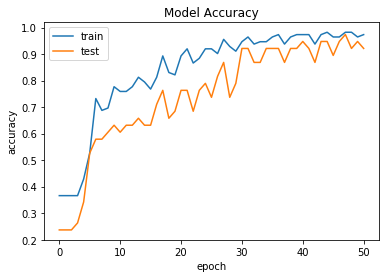

In [64]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

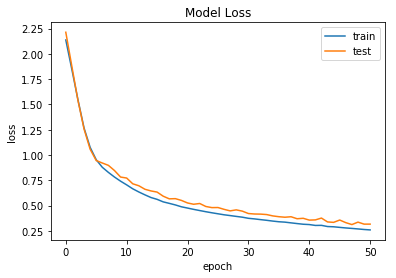

In [65]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
# load model
model = tf.keras.models.load_model('iris-weights.best.hdf5')
# summarize model.
model.summary()

In [66]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 92.11%
